In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import random
from sklearn.utils import shuffle
%matplotlib inline

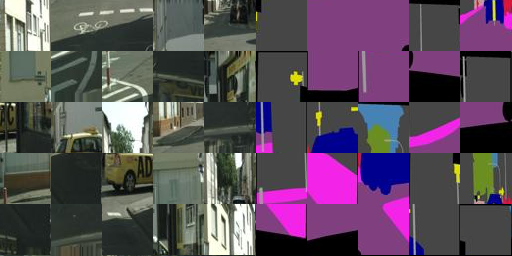

In [12]:
filepath = "./archive/val/1.jpg"
img = Image.open(filepath)
  
# get width and height
width,height = img.size
split_width = width / 2 # split into image/solution
nw = 5 # number of tiles to divide width (horizontally)
nh = 5 # number of tiles to divide height (vertically)
tile_width = split_width/nw
tile_height = height/nh

img_tiles = []
sol_tiles = []
for side in range(2):
    width_offset = side * split_width
    tiles = img_tiles if side == 0 else sol_tiles
    for i in range(nw):
        for j in range(nh):
            left = tile_width*i + width_offset
            right = tile_width*(i+1) + width_offset
            top =  tile_height*j
            bottom = tile_height*(j+1)
            
            im1 = img.crop((left, top, right, bottom))
            tiles.append(im1)


# imgs_shuffled = random.sample(img_tiles, len(img_tiles))
imgs_shuffled, sol_shuffled = shuffle(img_tiles, sol_tiles)
for side in range(2):
    width_offset = side * split_width
    tiles = imgs_shuffled if side == 0 else sol_shuffled
    idx = 0 # index tiles
    for i in range(nw):
        for j in range(nh):
            width_paste = int(tile_width*i + width_offset)
            height_paste = int(tile_height*j)
            img.paste(tiles[idx], (width_paste, height_paste))
            idx += 1

display(img)

    